#### Обработка данных

In [1]:
import pandas as pd
import numpy as np
from math import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cosh', 'ldexp', 'hypot', 'tan', 'isnan', 'log', 'fabs', 'floor', 'sqrt', 'frexp', 'degrees', 'pi', 'log10', 'sin', 'modf', 'copysign', 'cos', 'ceil', 'isinf', 'sinh', 'trunc', 'expm1', 'e', 'tanh', 'radians', 'fmod', 'exp', 'log1p', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
data = pd.read_csv('experiment.csv')

In [3]:
print data.head(5)

   index  feature1  feature2
0      1      0.07      0.27
1      2      0.12      0.35
2      3      0.20      0.45
3      4      0.27      0.52
4      5      0.32      0.57


Удалим 9 и 10 измерения в силу выброса, далее это обсудим подробнее 

feature1 = $m,~g$

feature2 = $U_{isu},~B$

feature3 = $F,~g \cdot cm \cdot s^{-2}$ = feature1 $\cdot 10^{3}$

feature4 = $U_{isu}^2,~B^2$

feature5 = $2 d \sqrt{\frac{2 \pi F}{S}},~g^{1/2} {cm}^{1/2} s^{-1}~=~U_{cgs}$

feature6 = $\sigma_F^{syst}~=~0.03 \cdot feature3$ 

feature7 = $\sigma_{U^2}^{syst}~=~2U \sigma^{syst}_u $

feature8 = $\sigma_{U_{cgs}}^{syst}$

In [4]:
d = 0.16
sigma_syst_d = 0.01
s = 42 
sigma_syst_s = 1
epsilon_syst_m = 0.03
sigma_syst_u = 0.02

In [5]:
data['feature2'] = data['feature2']*1000

In [6]:
data.insert(3, 'feature3', data['feature1']*1000)

In [7]:
data.insert(4, 'feature4', data['feature2']*data['feature2'])

In [8]:
print data.head(5)

   index  feature1  feature2  feature3  feature4
0      1      0.07       270        70     72900
1      2      0.12       350       120    122500
2      3      0.20       450       200    202500
3      4      0.27       520       270    270400
4      5      0.32       570       320    324900


In [9]:
data.insert(5, 'feature5', data['feature3'].apply(np.sqrt)*2*d*sqrt(2*pi/s))

In [10]:
data.insert(6, 'feature6', data['feature3']*epsilon_syst_m)

In [11]:
data.insert(7, 'feature7', sigma_syst_u*1000 * 2 * data['feature2'])

In [12]:
data.insert(8, 'feature8', data['feature5']*(1/d*sigma_syst_d + 1/(data['feature3']+s)*0.5))

In [13]:
data.insert(9, 'empty', 1)

In [14]:
data = data.drop([9,8])

In [15]:
print data.head(5)

   index  feature1  feature2  feature3  feature4  feature5  feature6  \
0      1      0.07       270        70     72900  1.035534       2.1   
1      2      0.12       350       120    122500  1.355832       3.6   
2      3      0.20       450       200    202500  1.750372       6.0   
3      4      0.27       520       270    270400  2.033748       8.1   
4      5      0.32       570       320    324900  2.214064       9.6   

   feature7  feature8  empty  
0     10800  0.069344      1  
1     14000  0.088924      1  
2     18000  0.113015      1  
3     20800  0.130368      1  
4     22800  0.141437      1  


#### Визуализация и информация о данных

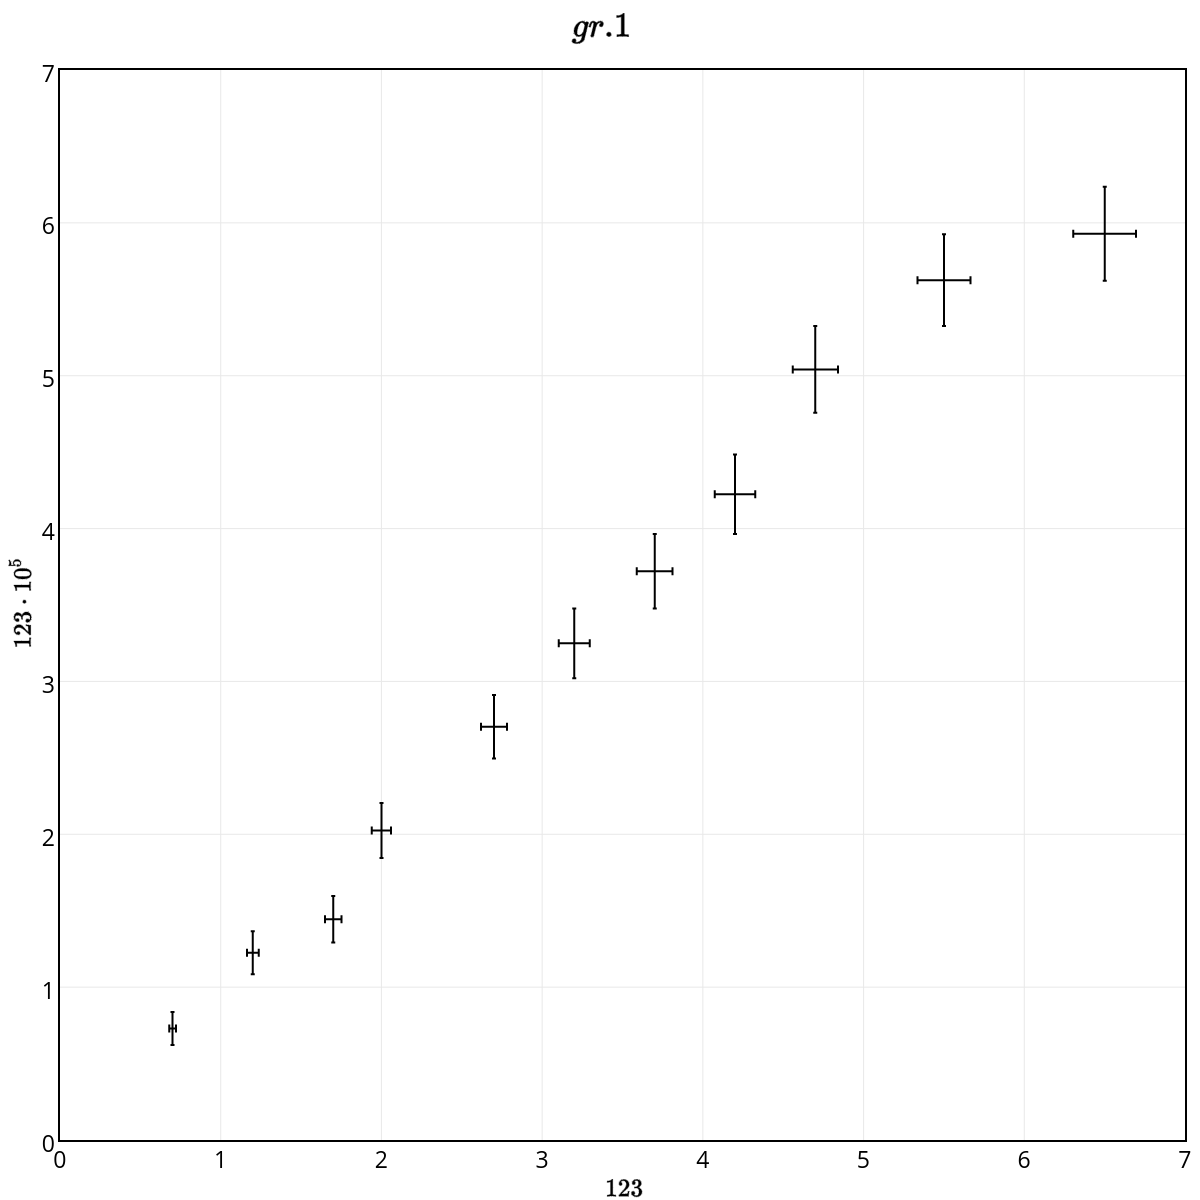

In [125]:
import plotly.plotly as py
import plotly.graph_objs as go

data1 = [
    go.Scatter(
        x = data['feature3']*0.01,
        y = data['feature4']/100000,
        mode = 'markers',
        name = 'gr1',
        error_y = dict(
            type = 'data',
            array = data['feature7']/100000,
            visible = True,
            color = '#000000',
            thickness = 2,
            width = 2
        ),
        error_x = dict(
            type = 'data',
            array = data['feature6']*0.01,
            visible = True,
            color = '#000000'
        ),
        marker = dict(
            size = 0,
            opacity = 0
        )
    )
]

layout = go.Layout(
        title = "$gr.1$",
        width = 1200,
        height = 1200,
        font = dict(
            size = 23,
            color = '#000000'
            ),
        paper_bgcolor = '#ffffff',
        xaxis = dict(
            title = '$123$',
            range = [0, 7],
            zeroline = False,
            ticklen = 0,
            color = '#000000',
            mirror = True,
            showline = True,
            linewidth = 2,
            titlefont = dict(
                size = 23,
                color = '#000000' 
                )
        ),
        yaxis = dict(
            title = '$123 \cdot 10^5$',
            range = [0, 7],
            zeroline = False,
            ticklen = 0,
            color = '#000000',
            mirror = True,
            showline = True,
            linewidth = 2,
            titlefont = dict(
                size = 23,
                color = '#000000' 
                )
        ),
        margin = dict(
            l = 60,
            r = 15,
            t = 70,
            b = 60,
            pad = 0 
        )
    
)

figure = go.Figure(data=data1, layout=layout)

#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(figure, 'my_plot.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot.png")